In [29]:
import pandas as pd  
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [30]:
airbnb_df = pd.read_csv("AirBnB_Reviews_Zipcode.csv")
census_df = pd.read_csv("housing_census_data.csv")

In [31]:
housing_census_df = pd.merge(census_df, airbnb_df, on="Zipcode")
housing_census_df.head()

,Zipcode,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Review Count
0,60601,1944,391100.0,13887,37.6,110215,95152,1171,8.432347,11.0
1,60602,1666,NaN,1277,31.1,115774,77279,32,2.505873,19.0
2,60603,1630,NaN,1197,26.7,140114,106207,261,21.804511,10.0
3,60604,1835,NaN,668,40.6,114565,130966,127,19.011976,22.0
4,60605,1865,284100.0,26188,33.6,107811,81144,2312,8.828471,20.0


In [32]:
len(housing_census_df)

57

In [33]:
housing_data_clean = housing_census_df[["Median Rent", "Household Income","Poverty Count", "Review Count"]]
housing_data_clean.head()

,Median Rent,Household Income,Poverty Count,Review Count
0,1944,110215,1171,11.0
1,1666,115774,32,19.0
2,1630,140114,261,10.0
3,1835,114565,127,22.0
4,1865,107811,2312,20.0


In [34]:
housing_data_clean.count()

Median Rent         57
Household Income    57
Poverty Count       57
Review Count        57
dtype: int64

In [35]:
X = housing_data_clean[['Household Income', 'Poverty Count', 'Review Count']].values
y = housing_data_clean['Median Rent'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
# coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df

,0
0,0.005837
1,-0.003308
2,7.427564


In [39]:
y_pred = regressor.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(15)

,Actual,Predicted
0,1634,1771.765588
1,1443,1488.009264
2,1507,1436.425478
3,1488,1883.200848
4,1713,1666.144891
5,1630,2034.622696
6,1349,1429.798879
7,1566,1636.620889
8,1441,1483.108592
9,1839,1540.728948


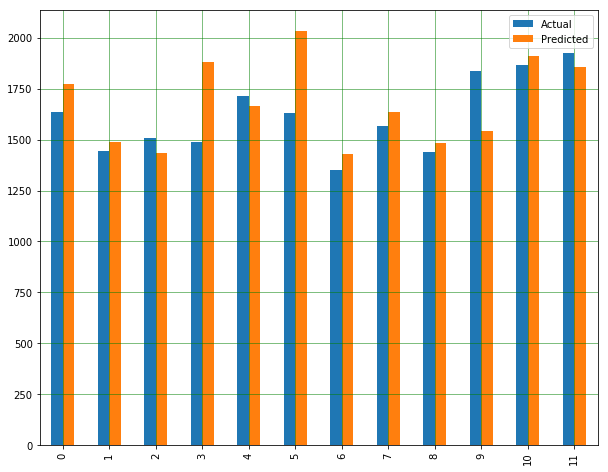

In [41]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 142.55416559606982
Mean Squared Error: 38136.21716425767
Root Mean Squared Error: 195.28496399942745


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

195.28496399942745
